<a href="https://colab.research.google.com/github/bigboyfreezy/Sentiment-analysis-projects/blob/main/Airline_sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Airline Sentiment Analysis

In [ ]:
import pandas
data = pandas.read_csv("https://modcom.co.ke/datasets/Tweets.csv")
data[['text','airline_sentiment']].head(10)

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [ ]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [ ]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(data['text'],data['airline_sentiment'],test_size=0.3,random_state=42)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#Removes stop words
vectorizer = CountVectorizer(lowercase=True,stop_words='english')
X_train_new= vectorizer.fit_transform(X_train)#Converts text to vectors and removes stopwords
X_train_new

<10248x12061 sparse matrix of type '<class 'numpy.int64'>'
	with 93480 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

model = LogisticRegression()
model.fit(X_train_new, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
X_test_new = vectorizer.transform(X_test)
predictions=model.predict(X_test_new)
print(data.groupby('airline_sentiment').size())

airline_sentiment
negative    9178
neutral     3099
positive    2363
dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy is",accuracy_score(Y_test,predictions))

Accuracy is 0.7898451730418944


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

    negative       0.84      0.90      0.87      2814
     neutral       0.61      0.55      0.58       884
    positive       0.76      0.66      0.71       694

    accuracy                           0.79      4392
   macro avg       0.74      0.70      0.72      4392
weighted avg       0.78      0.79      0.79      4392



In [ ]:
newdata = pandas.read_csv("https://modcom.co.ke/datasets/sample.csv")
newdata

,Text
0,your airline is awesome but your lax loft need...
1,"not worried, it's been a great ride in a new p..."
2,awesome. I flew yall Sat morning. Any way we c...
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a..."
4,"Hi, Virgin, I like your services"
5,"Your services are bad, its not as expected"
6,Its very unfortunate that I did not get what I...
7,"This is not good, improve!"
8,I waited for 40 minutes but we left though
9,"this is very nice, I enjoyed"


In [ ]:
#Use the model to predict the following sentiments
new_data_vectorized = vectorizer.transform(newdata['Text'])
Outcome=model.predict(new_data_vectorized)
outcome_df = pandas.DataFrame(Outcome,columns=['Outcomes'])
outcome_df


,Outcomes
0,negative
1,positive
2,positive
3,neutral
4,neutral
5,negative
6,neutral
7,positive
8,negative
9,positive


In [ ]:
tweetanalyzed=newdata.merge(outcome_df,left_index=True,right_index=True)
tweetanalyzed


,Text,Outcomes
0,your airline is awesome but your lax loft need...,negative
1,"not worried, it's been a great ride in a new p...",positive
2,awesome. I flew yall Sat morning. Any way we c...,positive
3,"Hi, Virgin! I'm on hold for 40-50 minutes -- a...",neutral
4,"Hi, Virgin, I like your services",neutral
5,"Your services are bad, its not as expected",negative
6,Its very unfortunate that I did not get what I...,neutral
7,"This is not good, improve!",positive
8,I waited for 40 minutes but we left though,negative
9,"this is very nice, I enjoyed",positive


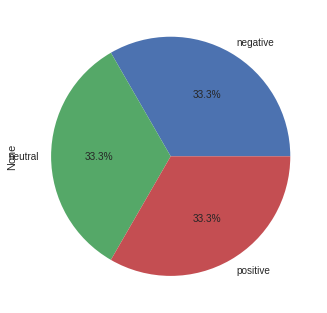

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
tweetanalyzed.groupby('Outcomes').size().plot(kind='pie', autopct = '%1.1f%%')


In [ ]:
negativetweets = tweetanalyzed[tweetanalyzed['Outcomes']=='negative']
negativetweets.to_csv('negative.csv')
positivetweets = tweetanalyzed[tweetanalyzed['Outcomes']=='positive']
positivetweets

,Text,Outcomes
1,"not worried, it's been a great ride in a new p...",positive
2,awesome. I flew yall Sat morning. Any way we c...,positive
7,"This is not good, improve!",positive
9,"this is very nice, I enjoyed",positive
